In [1]:
import pandas as pd
import re
import os
import numpy as np
import glob
from datetime import datetime
import geopandas as gpd
import json
from shapely.geometry import shape, GeometryCollection
from rasterio.plot import show
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

import shutil
import rasterio
%matplotlib inline

In [2]:
# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
# print(f)

plt.rc('font', family='Malgun Gothic')

In [3]:
def decimal_coords(coords, ref):
    decimal_degrees = coords[0] + coords[1] / 60 + coords[2] / 3600
    if ref == "S" or ref =='W' :
        decimal_degrees = -decimal_degrees
    return decimal_degrees

In [4]:
img_folder = r'D:\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본'
# img_folder = r'D:\2023_0825_레드엣지피-클럽디속리산\A\0001SET\000'

In [5]:
files = glob.glob(os.path.join(img_folder,'**/DJI_*.JPG'), recursive=True)

len(files)

7301

In [48]:
target_files = [ x for x in files if ('1.5m'in x) ]

target_files, len(target_files)

(['D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103730_0001_D.JPG',
  'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103732_0002_D.JPG',
  'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103734_0003_D.JPG',
  'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103736_0004_D.JPG',
  'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103738_0005_D.JPG',
  'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103740_0006_D.JPG',
  'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103742_0007_D.JPG',
  'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m

In [77]:
file_ = target_files[30]
file_

'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103830_0031_D.JPG'

In [78]:
from exif import Image as exifimg
img_path = file_

with open(img_path, 'rb') as src:
  img = exifimg(src)
  print (src.name, img)

coords = (
  decimal_coords(img.gps_longitude,
  img.gps_longitude_ref),
    decimal_coords(img.gps_latitude,
  img.gps_latitude_ref)
  )

  
img

D:\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\1_밸리6H\1.5m\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\DJI_20230823103830_0031_D.JPG <exif._image.Image object at 0x000001ED99DE2AF0>


In [79]:
coords, img.datetime_original

((128.6503686388889, 35.65459983333333), '2023:08:23 10:38:30')

In [80]:
'_'.join(os.path.split(file_)[1].split('_')[0:3])

'DJI_20230823103830_0031'

In [81]:
fileList = glob.glob(os.path.join(os.path.split(file_)[0],'_'.join(os.path.split(file_)[1].split('_')[0:3]) + '*'), recursive=True)
fileList

['D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103830_0031_D.JPG',
 'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103830_0031_MS_G.TIF',
 'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103830_0031_MS_NIR.TIF',
 'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103830_0031_MS_R.TIF',
 'D:\\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본\\1_밸리6H\\1.5m\\20230823_1037-1046_건조,패취류,썸머패취,켄터키,티,답압,장비피해\\DJI_20230823103830_0031_MS_RE.TIF']

In [82]:
with rasterio.open([ x for x in fileList if ('_MS_R' in x) ][0]) as src:
    band_red = src.read(1).astype(float)/65536.

with rasterio.open([ x for x in fileList if ('_MS_NIR' in x) ][0]) as src:
    band_nir = src.read(1).astype(float)/65536.

with rasterio.open([ x for x in fileList if ('_MS_G' in x) ][0]) as src:
    band_green = src.read(1).astype(float)/65536.

with rasterio.open([ x for x in fileList if ('_MS_RE' in x) ][0]) as src:
    band_red_edge = src.read(1).astype(float)/65536.

c:\anaconda3\envs\geo_James\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [83]:
band_green.max()

0.987060546875

In [84]:
from skimage import exposure

image_Nat  = np.array([(3*band_green - band_nir)/4, (3*band_green + band_nir)/4, band_red])

p2, p98 = np.percentile(image_Nat, (2,98))
image_Nat = exposure.rescale_intensity(image_Nat, in_range=(p2, p98))
image_Nat = np.moveaxis(image_Nat, 0, 2)

In [85]:
import numpy as np
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir.astype(float) + band_red.astype(float))

In [86]:
ndvi.shape

(1944, 2592)

In [87]:
from PIL import Image

RGBimg = np.asarray(Image.open(fileList[0]).resize((ndvi.shape[1],ndvi.shape[0])))
# RGBimg = np.asarray(Image.open(fileList[0]))

In [88]:
RGBimg.shape

(1944, 2592, 3)

Text(0.5, 1.0, 'RED Band')

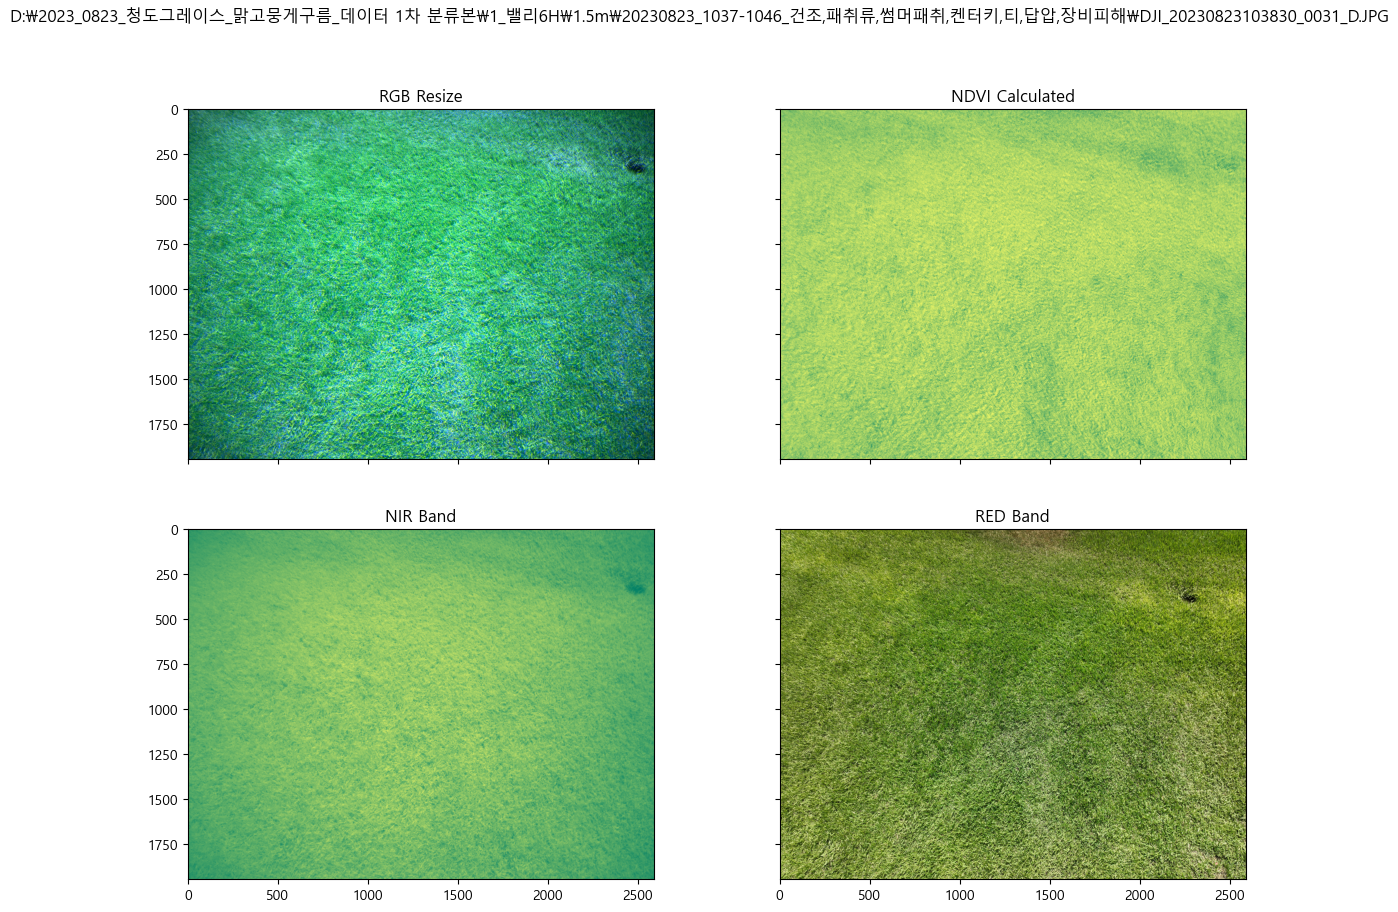

In [89]:

fig, axs = plt.subplots(2, 2 , figsize=(14, 10),sharex='col', sharey='row')
fig.suptitle(file_)

axs[0, 0].imshow(image_Nat)
axs[0, 0].set_title("RGB Resize")
axs[0, 1].imshow(ndvi, cmap=plt.cm.summer)
axs[0, 1].set_title("NDVI Calculated")
axs[1, 0].imshow(band_nir, cmap=plt.cm.summer)
axs[1, 0].set_title("NIR Band")
axs[1, 1].imshow(RGBimg)
axs[1, 1].set_title("RED Band")

# for ax in fig.get_axes():
#     ax.label_outer()

In [90]:
from match import FeatureExtraction, feature_matching

In [91]:
import cv2
features0 = FeatureExtraction(RGBimg)
image_Nat = cv2.normalize(image_Nat, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F).astype(np.uint8)
features1 = FeatureExtraction(image_Nat)

In [92]:
matches = feature_matching(features0, features1)

In [93]:
features0.matched_pts.shape,features1.matched_pts.shape

((115, 1, 2), (115, 1, 2))

In [94]:
len(matches)

115

In [95]:
H, _ = cv2.findHomography( features0.matched_pts, features1.matched_pts, cv2.RANSAC, 5.0)

In [96]:
matches = feature_matching(features0, features1)
# matched_image = cv2.drawMatches(RGBimg, features0.kps, image_Nat, features1.kps, matches, None, flags=2)

H, _ = cv2.findHomography( features0.matched_pts, features1.matched_pts, cv2.RANSAC, 5.0)

h, w, c = RGBimg.shape
warped = cv2.warpPerspective(RGBimg, H, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0, 0))




Text(0.5, 1.0, 'RED Band')

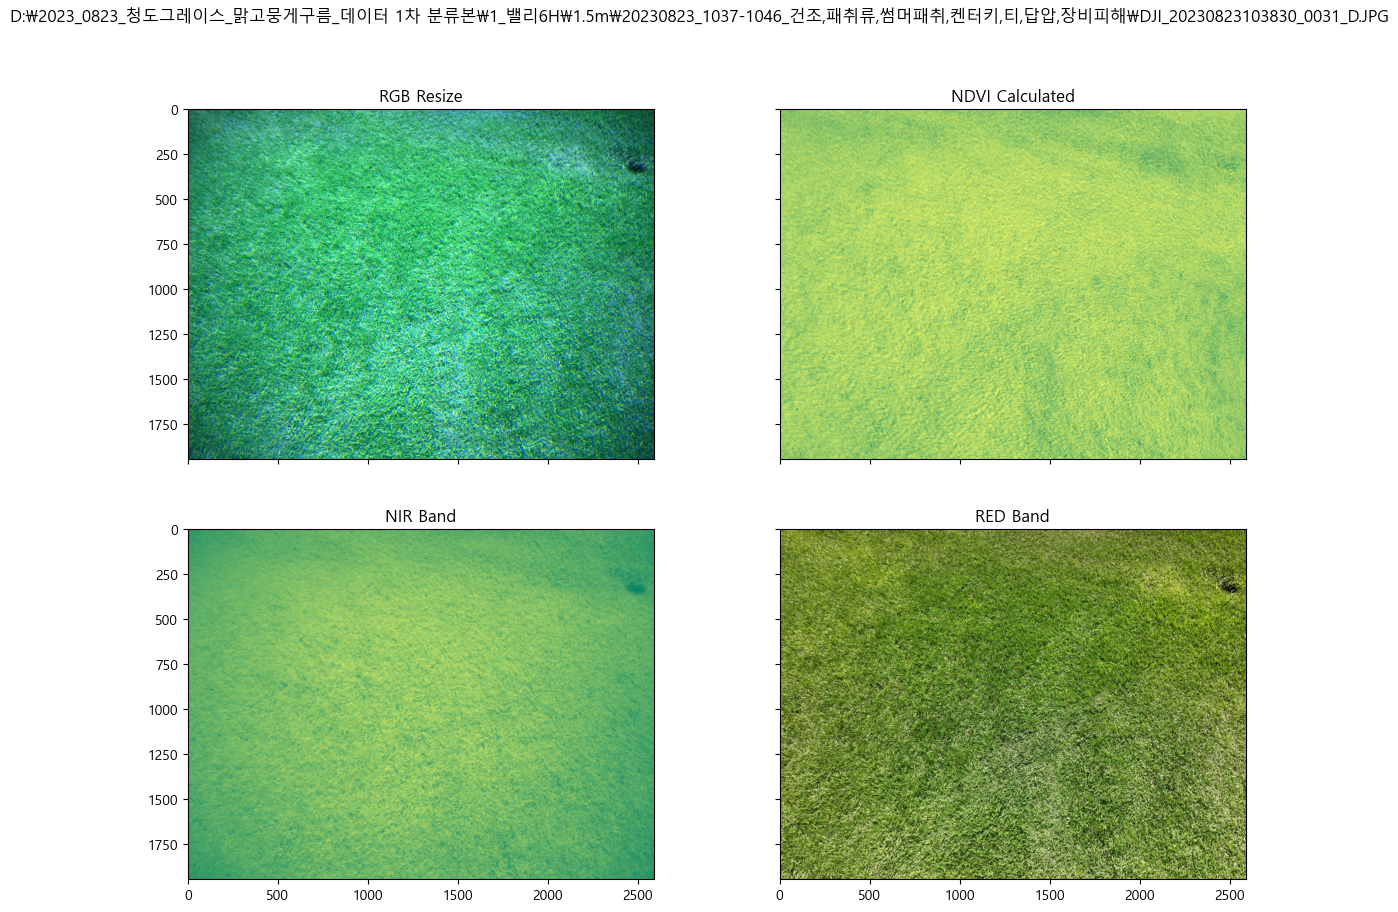

In [97]:

fig, axs = plt.subplots(2, 2 , figsize=(14, 10),sharex='col', sharey='row')
fig.suptitle(file_)

axs[0, 0].imshow(image_Nat)
axs[0, 0].set_title("RGB Resize")
axs[0, 1].imshow(ndvi, cmap=plt.cm.summer)
axs[0, 1].set_title("NDVI Calculated")
axs[1, 0].imshow(band_nir, cmap=plt.cm.summer)
axs[1, 0].set_title("NIR Band")
axs[1, 1].imshow(warped)
axs[1, 1].set_title("RED Band")


In [121]:
image_Nat

array([[[0.07048748, 0.20443566, 0.29907773],
        [0.10606061, 0.23737374, 0.30259113],
        [0.09903382, 0.23386034, 0.30522617],
        ...,
        [0.08519982, 0.21870883, 0.30522617],
        [0.05928854, 0.18006148, 0.30171278],
        [0.0564339 , 0.19082126, 0.27097058]],

       [[0.08080808, 0.21256039, 0.27536232],
        [0.07971014, 0.20970575, 0.2876592 ],
        [0.11045235, 0.24352218, 0.29644269],
        ...,
        [0.07158542, 0.20070268, 0.29732104],
        [0.06631533, 0.19148002, 0.31049627],
        [0.08519982, 0.21475626, 0.26921388]],

       [[0.08300395, 0.21431708, 0.28326746],
        [0.08585859, 0.21936759, 0.30171278],
        [0.07685551, 0.21783048, 0.31400966],
        ...,
        [0.06543698, 0.19762846, 0.29556434],
        [0.07861221, 0.21212121, 0.29205094],
        [0.08036891, 0.21036451, 0.26306544]],

       ...,

       [[0.03205973, 0.26526131, 0.28326746],
        [0.08168643, 0.30259113, 0.29819939],
        [0.12933685, 0